In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from fbprophet import Prophet

In [ ]:
# Load SPY price data
spy_data = pd.read_csv('SPY.csv')
spy_data = spy_data[['Date', 'Close']]
spy_data.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model on SPY data
model.fit(spy_data)

# Create future dates for forecasting
future_dates = model.make_future_dataframe(periods=365)

# Make predictions for future dates
forecast = model.predict(future_dates)

# Plot the forecasted data
model.plot(forecast, xlabel='Date', ylabel='SPY Price')

# Plot the forecasted trend and seasonality components
model.plot_components(forecast)


In [2]:
print(date.today())

2022-12-08


In [16]:
spy_ohlc_df = yf.download('SPY', start='2022-12-06', end='2022-12-07', interval='1m')

[*********************100%***********************]  1 of 1 completed


In [17]:
df=spy_ohlc_df.reset_index()
df

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-12-06 09:30:00,399.420013,399.630005,399.380005,399.480011,399.480011,1799957
1,2022-12-06 09:31:00,399.500000,399.640015,399.250000,399.600006,399.600006,168935
2,2022-12-06 09:32:00,399.730011,399.750000,399.700012,399.720001,399.720001,287806
3,2022-12-06 09:33:00,399.730011,399.989990,399.670105,399.810089,399.810089,266279
4,2022-12-06 09:34:00,399.820007,399.820007,399.540009,399.640015,399.640015,187963
...,...,...,...,...,...,...,...
385,2022-12-06 15:55:00,393.989990,394.170013,393.920013,393.975006,393.975006,563108
386,2022-12-06 15:56:00,393.975006,393.975006,393.549988,393.600006,393.600006,584523
387,2022-12-06 15:57:00,393.605011,393.809998,393.600006,393.670013,393.670013,392621
388,2022-12-06 15:58:00,393.670013,393.799988,393.579987,393.658386,393.658386,665440


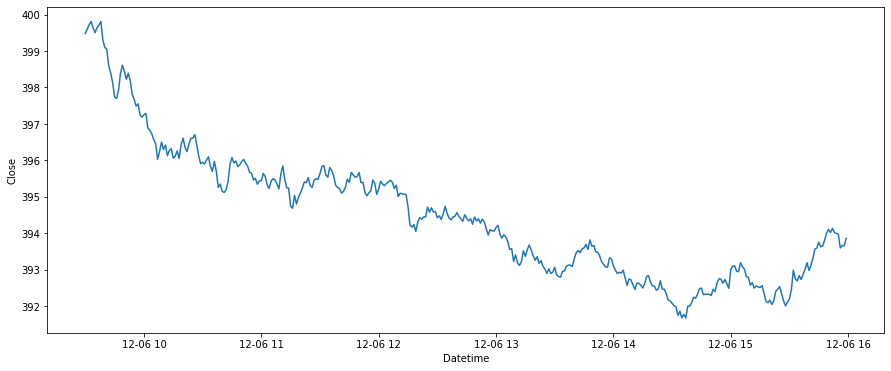

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(15,6)
sns.lineplot(x = 'Datetime', y = 'Close', data = df)
plt.show()

In [23]:
spy_ohlc_df = yf.download('SPY', start='2021-01-01', end=date.today())

[*********************100%***********************]  1 of 1 completed


In [24]:
df=spy_ohlc_df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,375.309998,375.450012,364.820007,368.790009,359.773285,110210800
1,2021-01-05,368.100006,372.500000,368.049988,371.329987,362.251160,66426200
2,2021-01-06,369.709991,376.980011,369.119995,373.549988,364.416840,107997700
3,2021-01-07,376.100006,379.899994,375.910004,379.100006,369.831177,68766800
4,2021-01-08,380.589996,381.489990,377.100006,381.260010,371.938354,71677200
...,...,...,...,...,...,...,...
481,2022-11-30,395.489990,407.679993,393.480011,407.679993,407.679993,144566700
482,2022-12-01,408.769989,410.000000,404.750000,407.380005,407.380005,76398200
483,2022-12-02,402.250000,407.859985,402.140015,406.910004,406.910004,85273900
484,2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800


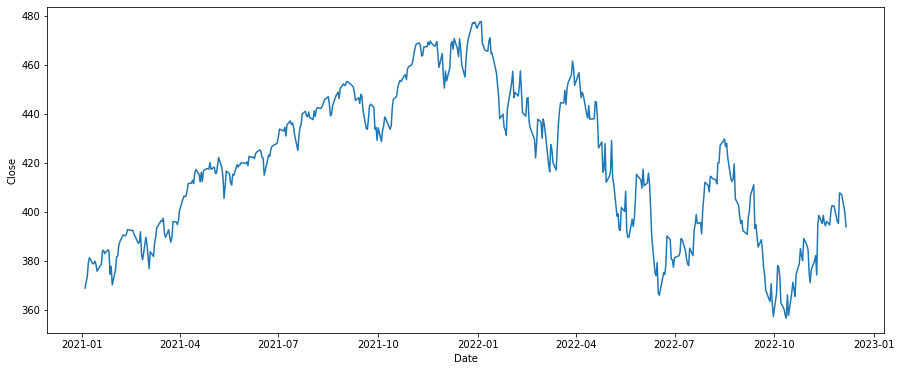

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(15,6)
sns.lineplot(x = 'Date', y = 'Close', data = df)
plt.show()